In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_tab = pd.read_csv("data.csv")

In [3]:
data_tab.drop("No", axis=1, inplace=True)

In [4]:
data_tab.head(1)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9


In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_tab, test_size=0.2, random_state=42)

c:\users\dpe\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\dpe\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\dpe\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122BC550>,
      dtype=object)

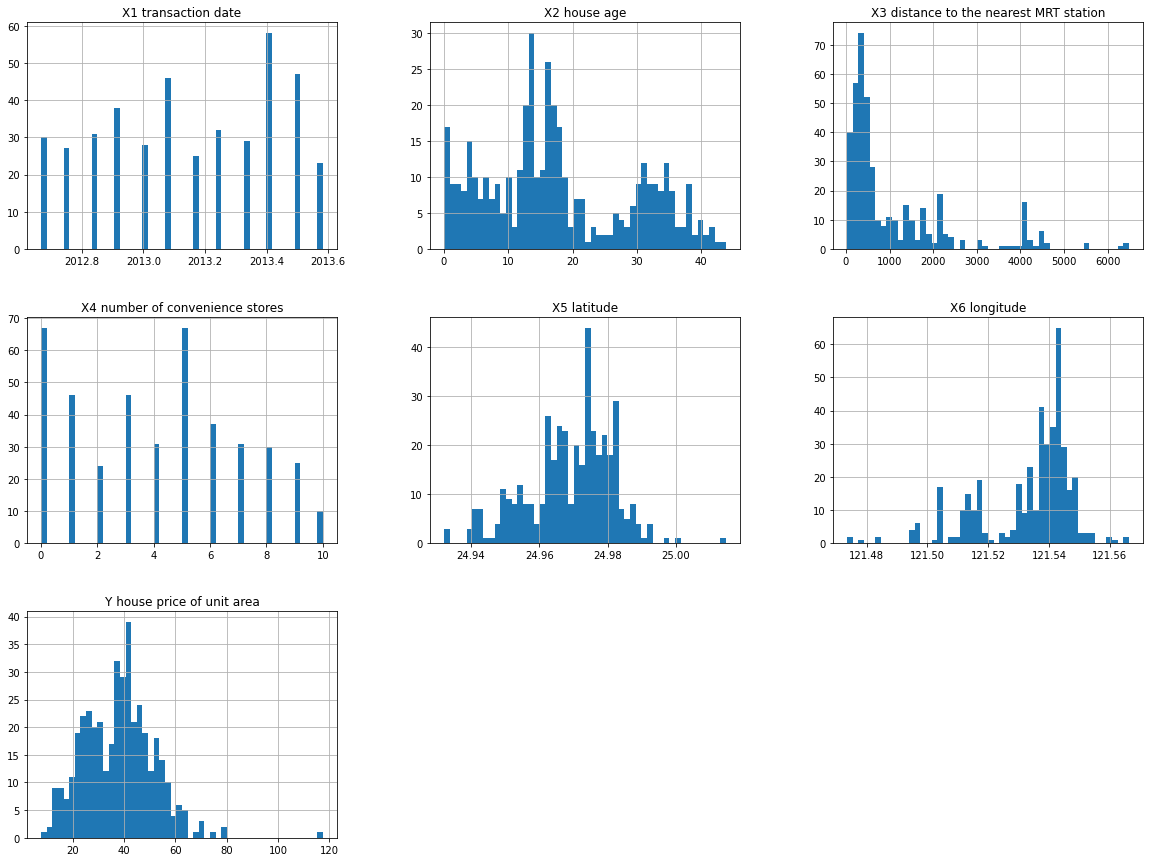

In [6]:
data_tab.hist(bins=50, figsize=(20,15))

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_tab, test_size=0.2, random_state=42)

In [8]:
len(train_set)

331

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data_tab, data_tab["X4 number of convenience stores"]):
    strat_train_set = data_tab.loc[train_index]
    strat_test_set = data_tab.loc[test_index]

In [10]:
strat_train_set["X4 number of convenience stores"].value_counts()

5     53
0     53
3     37
1     37
6     30
7     25
4     25
8     24
9     20
2     19
10     8
Name: X4 number of convenience stores, dtype: int64

In [11]:
data_tab = strat_train_set.copy()

In [12]:
data_tab["store_to_price"] = data_tab["X4 number of convenience stores"] / data_tab["Y house price of unit area"]

In [13]:
corr_matrix = data_tab.corr()

In [14]:
corr_matrix["Y house price of unit area"].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.636209
X5 latitude                               0.569626
X6 longitude                              0.535064
store_to_price                            0.237900
X1 transaction date                       0.054334
X2 house age                             -0.182001
X3 distance to the nearest MRT station   -0.692165
Name: Y house price of unit area, dtype: float64

In [15]:
from pandas.plotting import scatter_matrix
# attributes = ["X2 house age", "X3 distance to the nearest MRT station", 
#               "X4 number of convenience stores", 
#               "Y house price of unit area"]
# scatter_matrix(data_tab[attributes], figsize=(40,35), alpha=0.8)

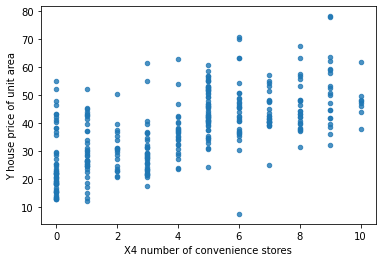

In [16]:
data_tab.plot(kind="scatter", x="X4 number of convenience stores", y="Y house price of unit area", alpha=0.8)

In [17]:
data_tab = strat_train_set.drop("Y house price of unit area", axis=1)

In [18]:
data_tab_label = strat_train_set["Y house price of unit area"].copy()

In [19]:
median = data_tab["X3 distance to the nearest MRT station"].median()
data_tab["X3 distance to the nearest MRT station"].fillna(median)

369    2185.12800
360      87.30222
180    4449.27000
188     190.03920
404     289.32480
          ...    
10      405.21340
381     132.54690
159     815.93140
141    1559.82700
292     395.67470
Name: X3 distance to the nearest MRT station, Length: 331, dtype: float64

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer(strategy="median")

In [22]:
imputer.fit(data_tab)

SimpleImputer(strategy='median')

In [23]:
X = imputer.transform(data_tab)

In [24]:
data_tab_tr = pd.DataFrame(X, columns=data_tab.columns)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
new_line = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scalar', StandardScaler())
])

In [27]:
data_tab_num_tr = new_line.fit_transform(data_tab_tr)

In [28]:
data_tab_num_tr.shape

(331, 6)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(data_tab_num_tr, data_tab_label)

RandomForestRegressor()

In [30]:
some_data = data_tab.iloc[:5]
some_labels = data_tab_label.iloc[:5]

In [31]:
prepared_data = new_line.transform(some_data)

In [32]:
model.predict(prepared_data)

array([23.706     , 45.158     , 14.995     , 43.746     , 44.45333333])

In [56]:
prepared_data

array([[-1.69732575,  0.18998546,  0.88477281, -0.37510886, -0.48993566,
        -1.38876478],
       [-1.69732575,  1.29629087, -0.79569251,  2.00606161,  1.11723968,
         0.43815207],
       [-1.69732575,  0.7736269 ,  2.69846588, -1.39561049, -1.64697191,
        -2.44883575],
       [-0.80543727,  1.46180113, -0.71339495,  1.32572719,  0.63541209,
         0.62838758],
       [ 0.67866516, -0.14103506, -0.63386213,  0.30522556,  1.03842471,
         0.65200302]])

In [33]:
list(some_labels)

[22.8, 47.1, 15.5, 44.3, 41.2]

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
data_prediction = model.predict(data_tab_num_tr)
mse = mean_squared_error(data_tab_label, data_prediction)
rmse = np.sqrt(mse)

In [36]:
rmse

2.5017319773749898

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, data_tab_num_tr, data_tab_label, scoring="neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-scores)

In [38]:
rmse_score

array([4.65069592, 8.03292104, 4.72526736, 7.93704788, 9.02444941,
       5.17630068, 6.67314212, 5.40474358, 5.22742077, 9.39967488])

In [39]:
def display_score(scores):
    print(f"scores: {scores}\nmean:{scores.mean()}\nstd: {scores.std()}")

In [40]:
display_score(rmse_score)

scores: [4.65069592 8.03292104 4.72526736 7.93704788 9.02444941 5.17630068
 6.67314212 5.40474358 5.22742077 9.39967488]
mean:6.625166363494226
std: 1.738103873193581


DecisionTreeRegressor

mean:8.966684920148149

std: 1.950620942090452

LinearRegression

mean:7.835908645083677

std: 1.7262734674965259

RandomForest

mean:6.595184193340097

std: 1.7167941069205728

In [43]:
from joblib import dump, load
dump(model, "realestate.joblib")

['realestate.joblib']

In [48]:
X_test = strat_test_set.drop("Y house price of unit area", axis=1)
Y_test = strat_test_set["Y house price of unit area"].copy()
X_test_prepared = new_line.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [52]:
print(f"{final_prediction} {list(Y_test)}")

[51.30857143 45.61471667 20.126      25.116      52.296      24.645
 41.836      26.09758333 36.942      46.1351     28.197      54.7972
 48.324      25.769      58.6        38.59833333 15.936      45.878
 46.6155     38.158      45.173      36.789      34.14       28.955
 24.755      40.117      51.56833333 22.83283333 32.974      41.901
 28.52       39.035      59.74066667 44.42146667 20.47233333 36.672
 49.041      24.74533333 34.51566667 16.745      39.918      50.80053333
 31.90433333 38.50966667 27.827      56.53645    43.864      32.17766667
 25.265      52.65525    52.366      45.15091667 18.691      46.70433333
 45.716      48.362      48.22163333 48.607      66.932      38.629
 37.181      15.751      28.955      40.333      24.19       28.955
 40.20583333 64.519      15.5304     39.49       42.04966667 21.52615
 33.327      45.574      40.277      26.048      60.2185     27.249
 44.46233333 17.375      53.109      55.4708     48.8555    ] [59.6, 40.3, 25.3, 24.7, 55.0, 45.1,

In [54]:
from joblib import load
model = load("realestate.joblib")

In [68]:
model.predict([[ 1.96866516, -0.14145506, -0.63386213,  1.40522556,  1.03842471,
         0.415200302]])

array([50.78933333])